In [6]:
import re
import onnxruntime

from transformers import DonutProcessor, AutoTokenizer
from optimum.onnxruntime import ORTModelForVision2Seq
from datasets import load_dataset
from PIL import Image

In [39]:
# Load processor, tokenizer
processor = DonutProcessor.from_pretrained("naver-clova-ix/donut-base-finetuned-cord-v2")
tokenizer = AutoTokenizer.from_pretrained("naver-clova-ix/donut-base-finetuned-cord-v2")

c:\Users\EndUser\anaconda3\envs\ai\Lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration. Please open a PR/issue to update `preprocessor_config.json` to use `image_processor_type` instead of `feature_extractor_type`. This warning will be removed in v4.40.


In [40]:
cpu_options = onnxruntime.SessionOptions()

In [41]:
model_path = "C:\\Users\\EndUser\\Desktop\\repos\\models\\"
encoder_model_path = "C:\\Users\\EndUser\\Desktop\\repos\\models\\encoder_model.onnx"
decoder_model_path = "C:\\Users\\EndUser\\Desktop\\repos\\models\\decoder_model.onnx"
decoder_with_past_model_path = "C:\\Users\\EndUser\\Desktop\\repos\\models\\decoder_with_past_model.onnx"

#Run on CPU
model = ORTModelForVision2Seq.from_pretrained(model_path, 
                                              export=False, 
                                              provider="CPUExecutionProvider", 
                                              session_options = cpu_options,
                                            #   provider_options = [{'config_file': config_file_path}]       
                                              )

# model = ORTModelForVision2Seq.load_model(encoder_path=encoder_model_path,
#                                          decoder_path=decoder_model_path,
#                                          decoder_with_past_path=decoder_with_past_model_path,
#                                          provider="CPUExecutionProvider",
#                                          session_options = cpu_options,
#                                          provider_options = None)

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [42]:
# Load document image
dataset = load_dataset("hf-internal-testing/example-documents", split="test")
print(len(dataset))

3


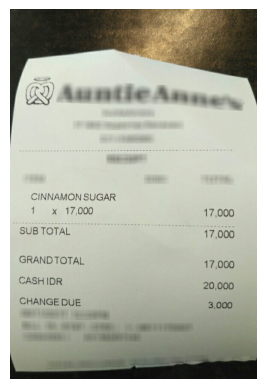

In [43]:
#image
image = dataset[2]["image"]

import matplotlib.pyplot as plt
# Display the image
plt.imshow(image)
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()

In [44]:
# Prepare decoder inputs
task_prompt = "<s_cord-v2>"
decoder_input_ids = tokenizer(task_prompt, add_special_tokens=False, return_tensors="pt").input_ids
print(decoder_input_ids)

tensor([[57579]])


In [45]:
# Preprocess the image
pixel_values = processor(image, return_tensors="pt").pixel_values

In [46]:
print(pixel_values)

tensor([[[[-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          ...,
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.]],

         [[-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          ...,
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.]],

         [[-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          ...,
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.]]]])


In [47]:
# Generate output using ORTModel (Assuming use_cache and other parameters are supported by ORTModelForVision2Seq)
outputs = model.generate(
    pixel_values=pixel_values,
    decoder_input_ids=decoder_input_ids,
    # max_length=model.decoder.config.max_position_embeddings,
    max_length=512,
    pad_token_id=tokenizer.pad_token_id,
    eos_token_id=tokenizer.eos_token_id,
    use_cache=True,
    bad_words_ids=[[tokenizer.unk_token_id]],
    return_dict_in_generate=True,
)


In [48]:
print(outputs)

GenerateEncoderDecoderOutput(sequences=tensor([[    0, 57579, 57209, 57209, 57209, 57209, 57209, 57209, 57209, 57209,
         57209, 57209, 57209, 57209, 49359, 49359, 49359, 49359, 49359, 49359,
         49359, 49359, 49359, 49359, 49359, 49359, 49359, 49359, 49359, 49359,
         49359, 49359, 49359, 49359, 49359, 49359, 49359, 49359, 49359, 49359,
         49359, 49359, 49359, 49359, 49359, 49359, 49359, 49359, 49359, 49359,
         49359, 49359, 49359, 49359, 49359, 49359, 49359, 49359, 49359, 49359,
         49359, 49359, 49359, 49359, 49359, 49359, 49359, 49359, 49359, 49359,
         49359, 49359, 49359, 49359, 49359, 49359, 49359, 49359, 49359, 49359,
         49359, 49359, 49359, 49359, 49359, 49359, 49359, 49359, 49359, 49359,
         49359, 49359, 49359, 49359, 49359, 49359, 49359, 49359, 49359, 49359,
         49359, 49359, 49359, 49359, 49359, 49359, 49359, 49359, 49359, 49359,
         49359, 49359, 49359, 49359, 49359, 49359, 49359, 49359, 49359, 49359,
         4935

In [56]:
# Decode the output
sequence = tokenizer.batch_decode(outputs.sequences)[0]

In [57]:
sequence = sequence.replace(tokenizer.eos_token, "").replace(tokenizer.pad_token, "")

In [58]:
sequence = re.sub(r"<.*?>", "", sequence, count=1).strip()  # remove first task start token

In [61]:
print(sequence)

<s_cord-v2>业业业业业业业业业业业业总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总总业业业业业业业业业业业总业总业总业总业总业总业总业总业总业总业总业总业总业总业总业总业总业总业总业总业总业总业总业总业总业总业总业总业总业总业总业总业总业总业总业总业总业总业总业总业总业总业总业总业总业总业总业总业总业总
